# Exercise: Compare Rainfall Between London and Seattle¶

Tasks:
1. Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022.
      - London Coordinates: Latitude 51.5074, Longitude -0.1278
      - Seattle Coordinates: Latitude 47.6062, Longitude -122.3321
2. Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
3. Resample Data: Resample the hourly data to weekly totals.
4. Visualization: Plot the weekly total precipitation for both cities on the same graph.
5. Analysis: Determine which city had more rainfall overall and identify any interesting patterns.

In [106]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

**TASK ONE- Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022.**

In [109]:
#Set Up Parameters

# Location coordinates for London
latitude_L = 51.5074
longitude_L = -0.1278

# Location coordinates for Seattle
latitude_S = 47.6062
longitude_S = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [111]:
#Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_L = {
    'latitude': latitude_L,
    'longitude': longitude_L,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response_L = requests.get(base_url, params=params)


params_S = {
    'latitude': latitude_S,
    'longitude': longitude_S,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_S = requests.get(base_url, params=params_S)


In [112]:
# Check if the request was successful

if response_L.status_code == 200:
    print('Data for london was fetched successfully!')
else:
    print(f'Failed to fetch london data. Status code: {response.status_code}')

if response_S.status_code == 200:
    print('Data for seattle was fetched successfully!')
else:
    print(f'Failed to fetch Seattle data. Status code: {response.status_code}')

Data for london was fetched successfully!
Data for seattle was fetched successfully!


In [115]:
#Load London Data into pandas DataFrame

data_L = response_L.json()
hourly_data_L = data_L['hourly']

df_L = pd.DataFrame(hourly_data_L)
df_L.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,93,0.0
1,2022-01-01T01:00,12.8,93,0.0
2,2022-01-01T02:00,12.5,93,0.0
3,2022-01-01T03:00,12.3,92,0.0
4,2022-01-01T04:00,11.9,93,0.0


In [117]:
#Load Seattle Data into pandas DataFrame

data_S = response_S.json()
hourly_data_S = data_S['hourly']

df_S = pd.DataFrame(hourly_data_S)
df_S.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,-6.4,76,0.0
1,2022-01-01T01:00,-8.3,82,0.0
2,2022-01-01T02:00,-8.1,82,0.0
3,2022-01-01T03:00,-7.9,81,0.0
4,2022-01-01T04:00,-6.2,73,0.0


**TASK TWO- Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values.**

In [120]:
#Cleaning London Data

# Convert 'time' column to datetime
df_L['time'] = pd.to_datetime(df_L['time'])

# Set 'time' as the index
df_L.set_index('time', inplace=True)

# Check for missing values
df_L.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [122]:
#Cleaning Seattle Data

# Convert 'time' column to datetime
df_S['time'] = pd.to_datetime(df_S['time'])

# Set 'time' as the index
df_S.set_index('time', inplace=True)

# Check for missing values
df_S.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [124]:
# Handle missing values (if any)
df_L.fillna(method='ffill', inplace=True)  # Forward fill
df_S.fillna(method='ffill', inplace=True)  # Forward fill

/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_46533/582059762.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_L.fillna(method='ffill', inplace=True)  # Forward fill
/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_46533/582059762.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_S.fillna(method='ffill', inplace=True)  # Forward fill


Exploratory Data Analysis

In [127]:
# Summary Statistics for London
df_L.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013014,76.635160,0.075696
std,6.651762,16.721898,0.404506
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


In [129]:
# Summary Statistics for Seattle
df_S.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,10.485993,78.177854,0.129132
std,6.641324,14.032927,0.463708
min,-8.300000,20.000000,0.000000
25%,5.400000,69.000000,0.000000
50%,9.700000,81.000000,0.000000
75%,15.200000,89.000000,0.000000
max,31.100000,100.000000,7.700000


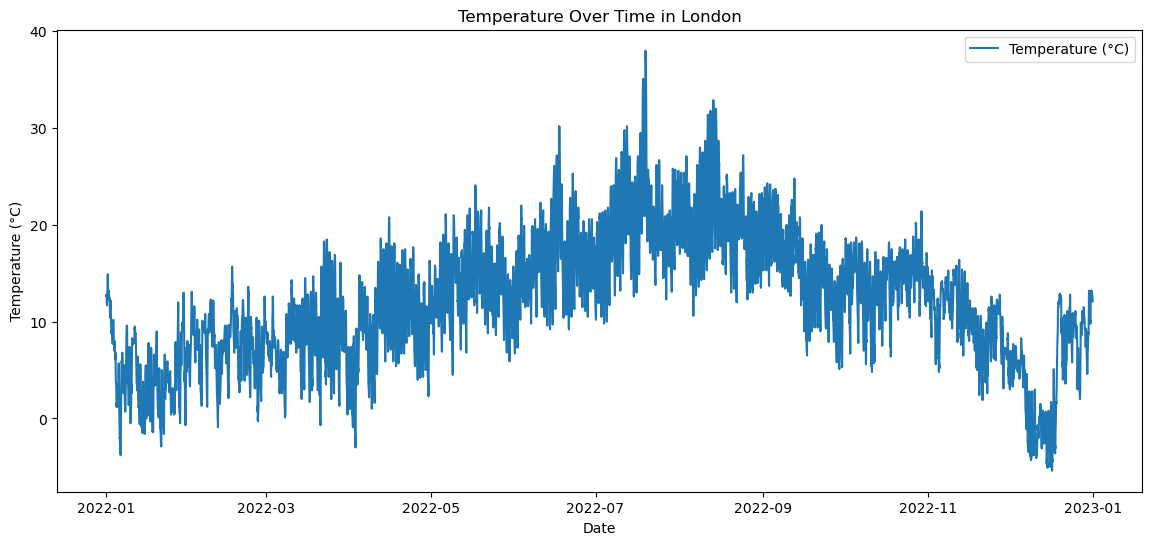

In [131]:
# Plot Temperature Over Time for London

plt.figure(figsize=(14, 6))
plt.plot(df_L.index, df_L['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

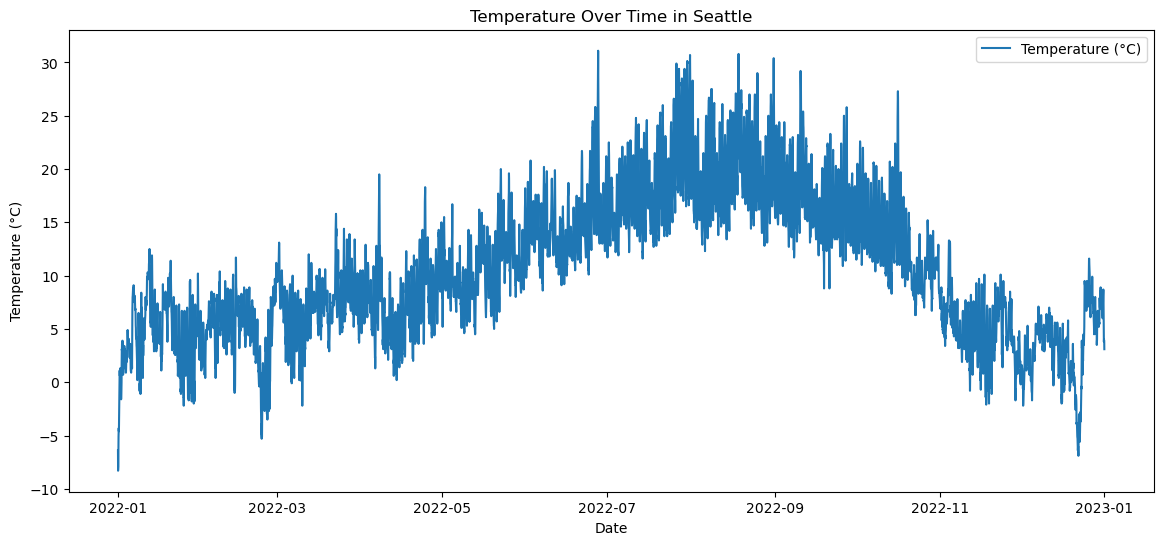

In [133]:
# Plot Temperature Over Time for Seattle

plt.figure(figsize=(14, 6))
plt.plot(df_S.index, df_S['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

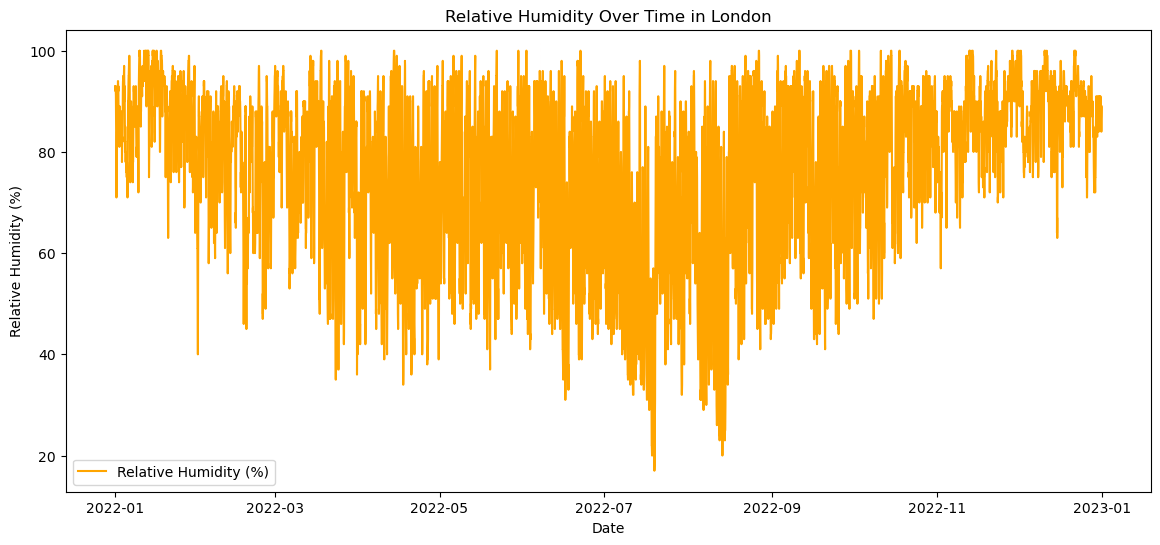

In [135]:
# Plot Relative Humidity Over Time for London

plt.figure(figsize=(14, 6))
plt.plot(df_L.index, df_L['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in London')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


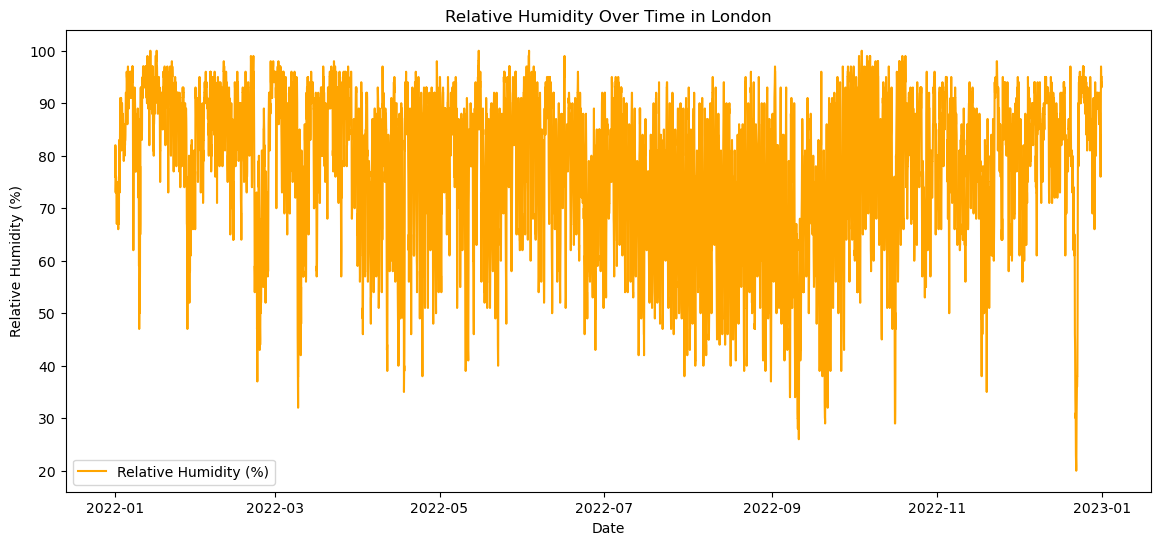

In [137]:
# Plot Relative Humidity Over Time for Seattle

plt.figure(figsize=(14, 6))
plt.plot(df_S.index, df_S['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in London')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


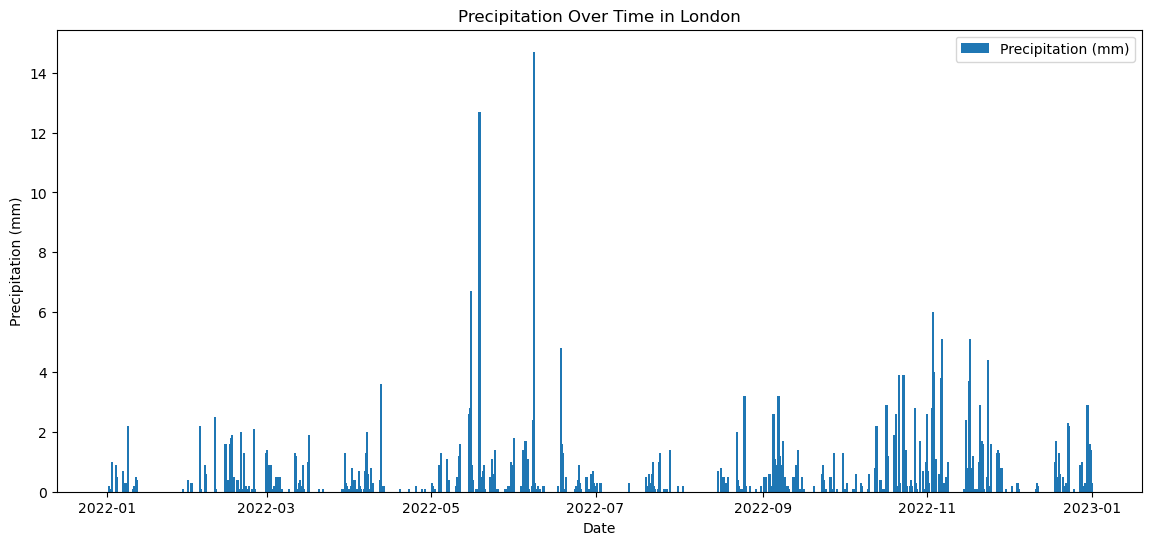

In [139]:
# Plot Precipitation Over Time for London

plt.figure(figsize=(14, 6))
plt.bar(df_L.index, df_L['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in London')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


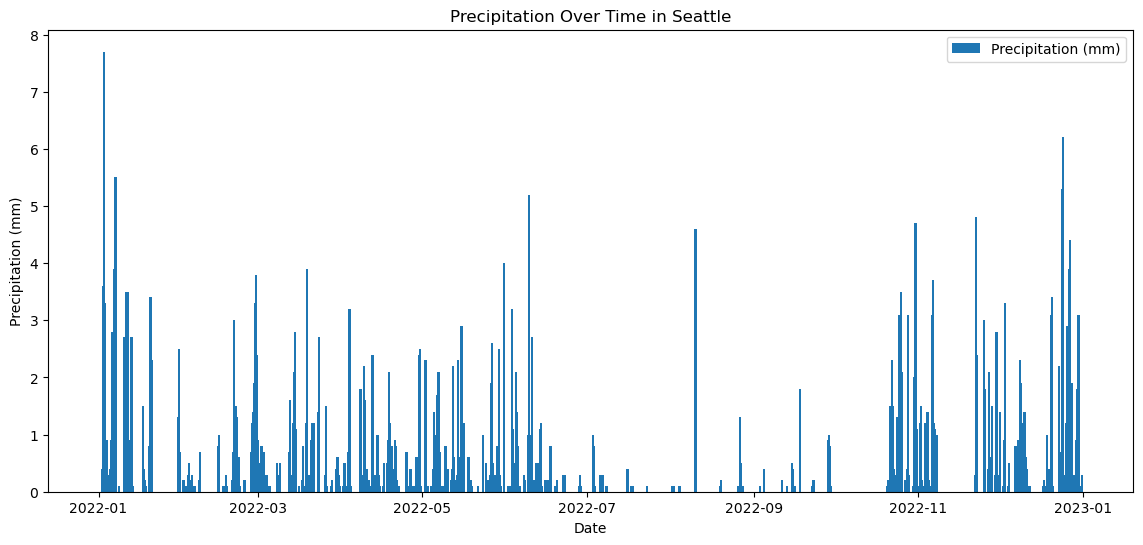

In [140]:
# Plot Precipitation Over Time for Seattle

plt.figure(figsize=(14, 6))
plt.bar(df_S.index, df_S['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [141]:
# Correlation Analysis

# Calculate correlation between temperature and humidity in London
correlation_L = df_L['temperature_2m'].corr(df_L['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity in London: {correlation_L:.2f}')

# Calculate correlation between temperature and humidity in London
correlation_S = df_S['temperature_2m'].corr(df_S['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity in Seattle: {correlation_S:.2f}')

Correlation between Temperature and Relative Humidity in London: -0.66
Correlation between Temperature and Relative Humidity in Seattle: -0.49


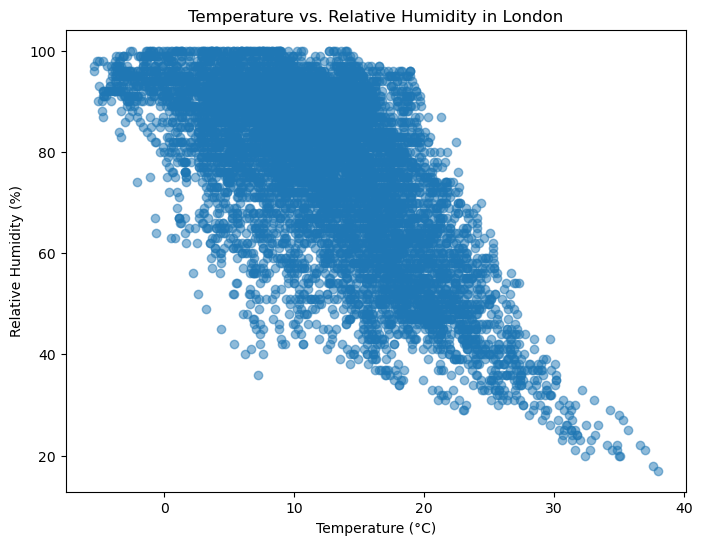

In [142]:
# Scatter Plot of Temperature vs. Relative Humidity for London

plt.figure(figsize=(8, 6))
plt.scatter(df_L['temperature_2m'], df_L['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity in London')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


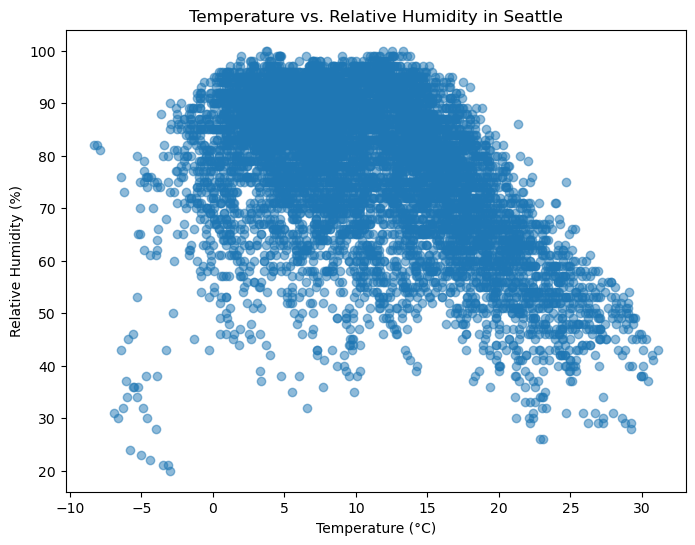

In [144]:
# Scatter Plot of Temperature vs. Relative Humidity for Seattle

plt.figure(figsize=(8, 6))
plt.scatter(df_S['temperature_2m'], df_S['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity in Seattle')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


**TASK THREE- Resample Data:  Resample the hourly data to weekly totals.**

In [162]:
#Resample London Data to weekly Averages 
weekly_avg_L = df_L.resample('W').mean()
weekly_avg_L.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,11.993750,86.458333,0.045833
2022-01-09,4.238690,86.089286,0.076786
2022-01-16,3.532143,94.696429,0.018452
2022-01-23,2.617262,89.416667,0.000000
2022-01-30,4.838690,86.476190,0.002381


In [164]:
#Resample Seattle Data to weekly Averages 
weekly_avg_S = df_S.resample('W').mean()
weekly_avg_S.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,-0.516667,75.520833,0.797917
2022-01-09,3.821429,86.404762,0.605952
2022-01-16,6.336310,91.232143,0.270833
2022-01-23,5.741667,90.684524,0.093452
2022-01-30,2.622024,79.470238,0.039286


**TASK FOUR- Visualization: Plot the weekly total precipitation for both cities on the same graph.**

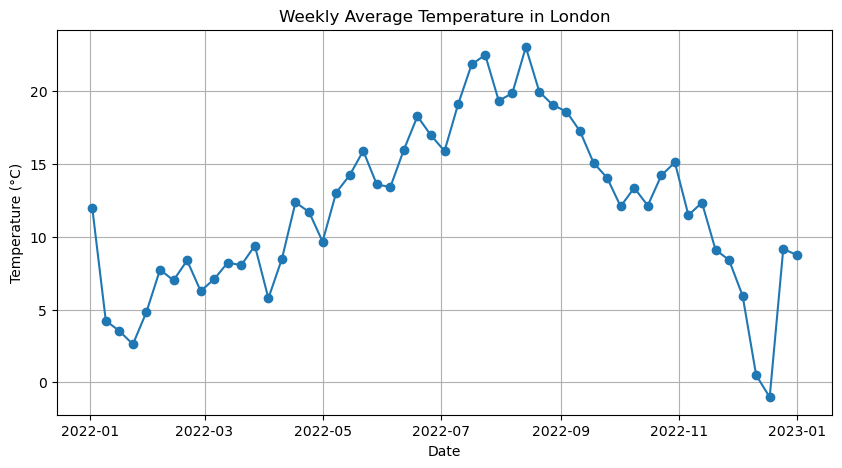

In [166]:
# Plot Daily Average Temperature for London

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg_L.index, weekly_avg_L['temperature_2m'], marker='o')
plt.title('Weekly Average Temperature in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


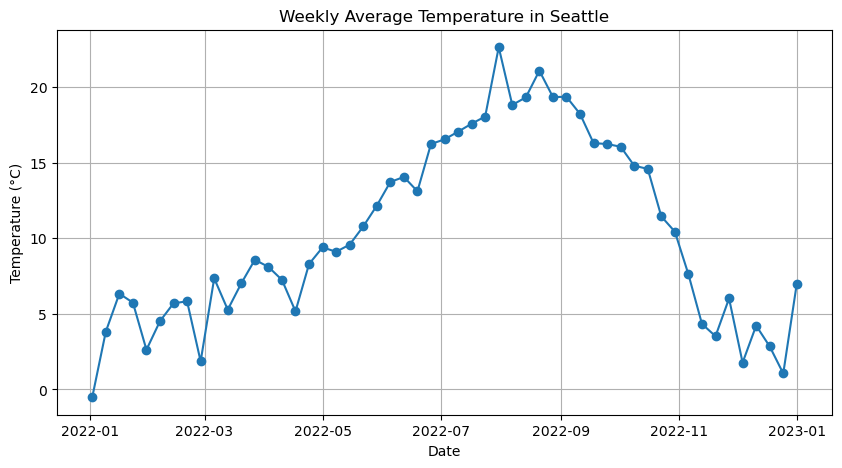

In [168]:
# Plot Daily Average Temperature for Seattle

plt.figure(figsize=(10, 5))
plt.plot(weekly_avg_S.index, weekly_avg_S['temperature_2m'], marker='o')
plt.title('Weekly Average Temperature in Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [170]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'London': weekly_avg_L['temperature_2m'],
    'Seattle': weekly_avg_L['temperature_2m']
})


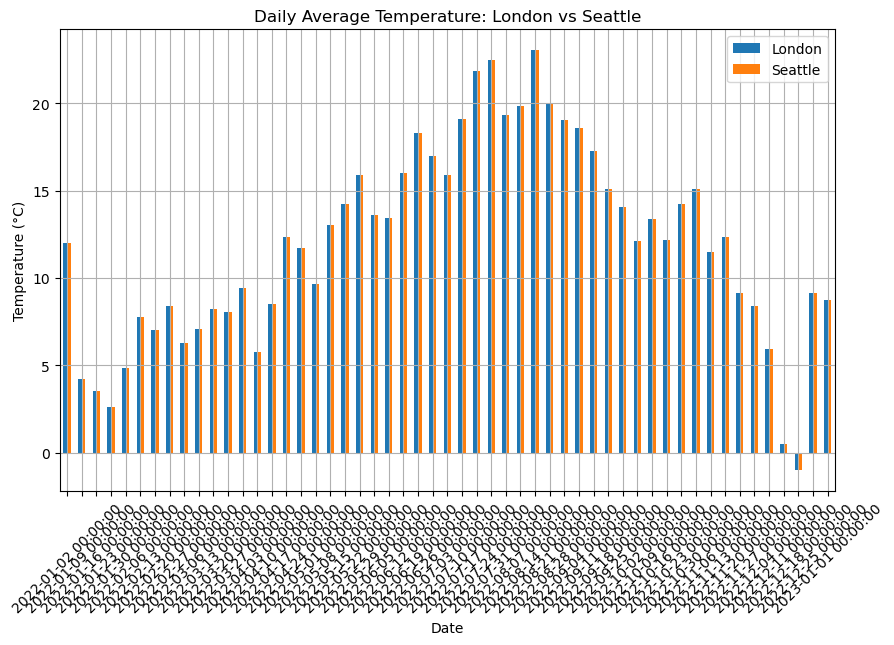

In [172]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [174]:
#Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Seattle'] - combined_temp['London']
combined_temp


,London,Seattle,Temp Difference
time,,,
2022-01-02,11.993750,11.993750,0.0
2022-01-09,4.238690,4.238690,0.0
2022-01-16,3.532143,3.532143,0.0
2022-01-23,2.617262,2.617262,0.0
2022-01-30,4.838690,4.838690,0.0
2022-02-06,7.740476,7.740476,0.0
2022-02-13,7.011310,7.011310,0.0
2022-02-20,8.380952,8.380952,0.0
2022-02-27,6.275595,6.275595,0.0


In [23]:
# Save Data to CSV (Optional)

# Save London data
df_L.to_csv('london_weather.csv')

# Save Seattle data
df_S.to_csv('seattle_weather.csv')
